In [39]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import math

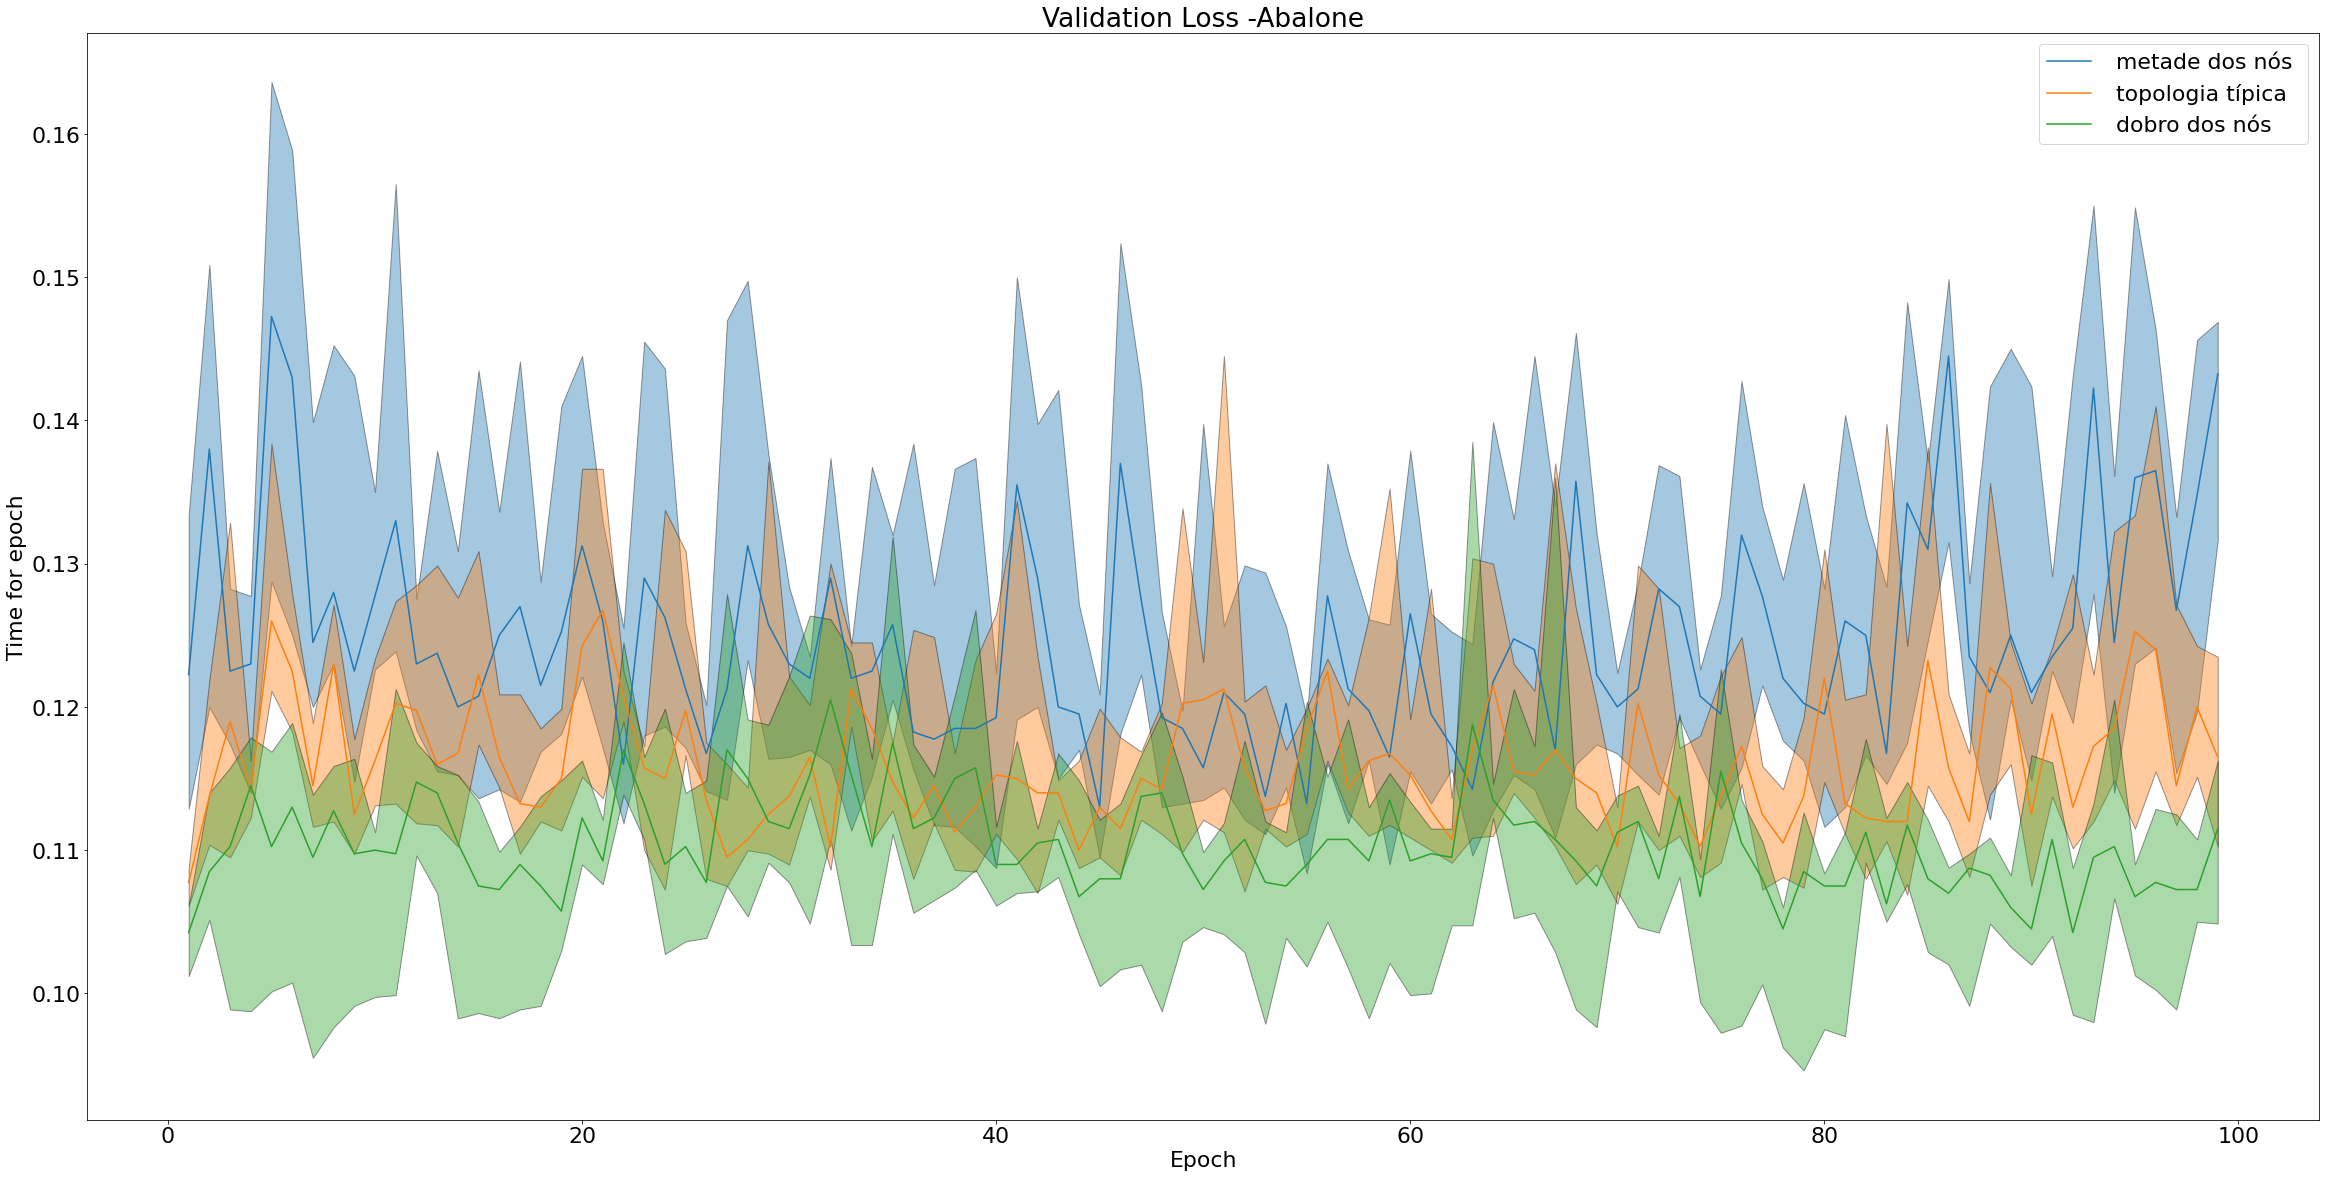

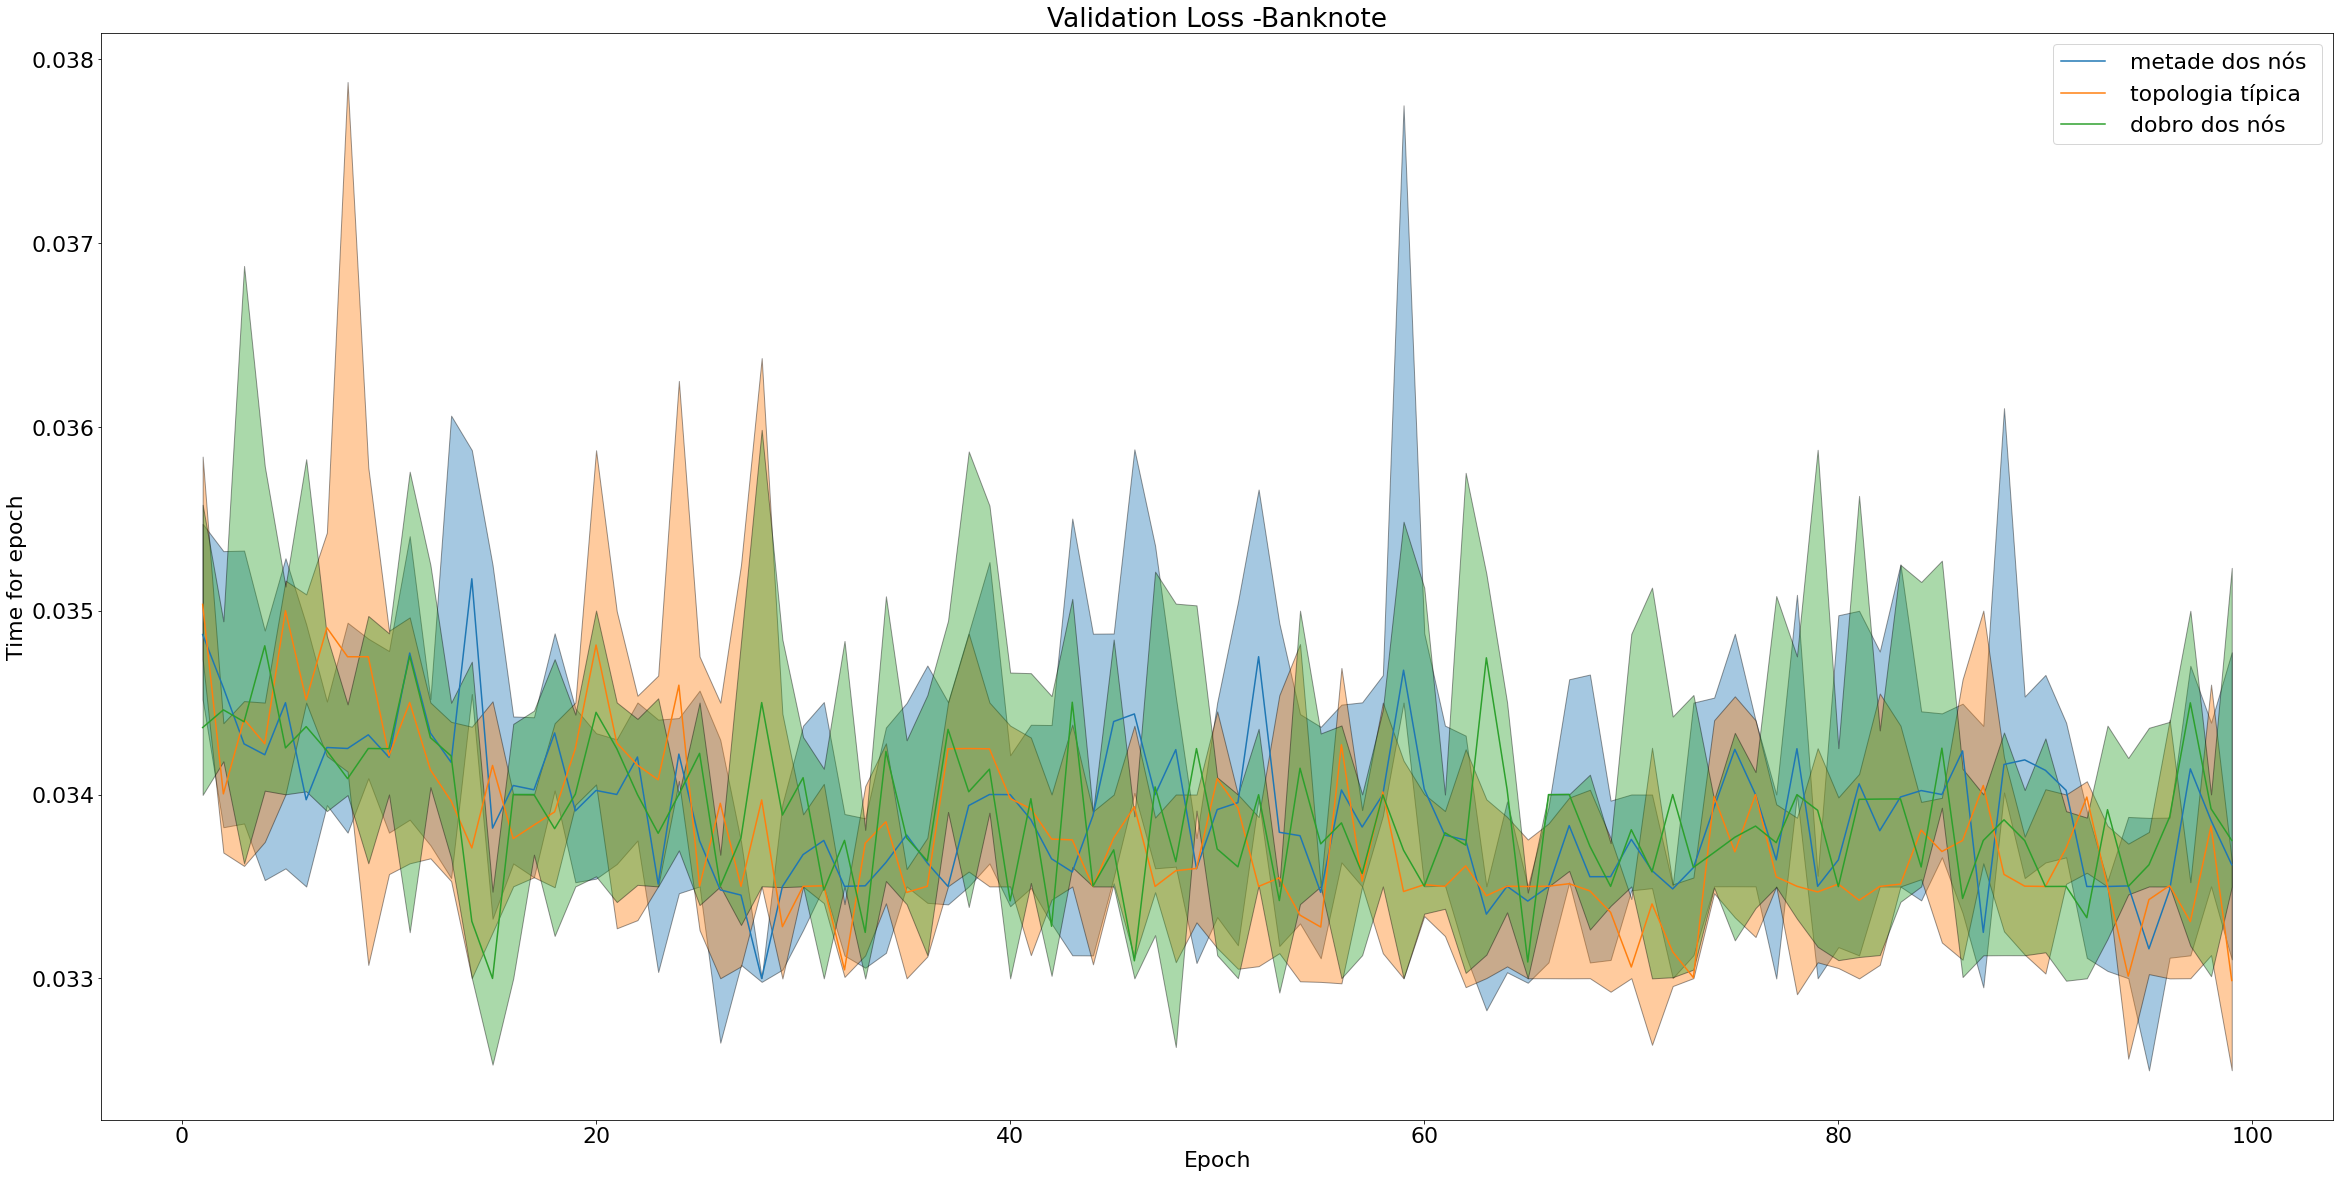

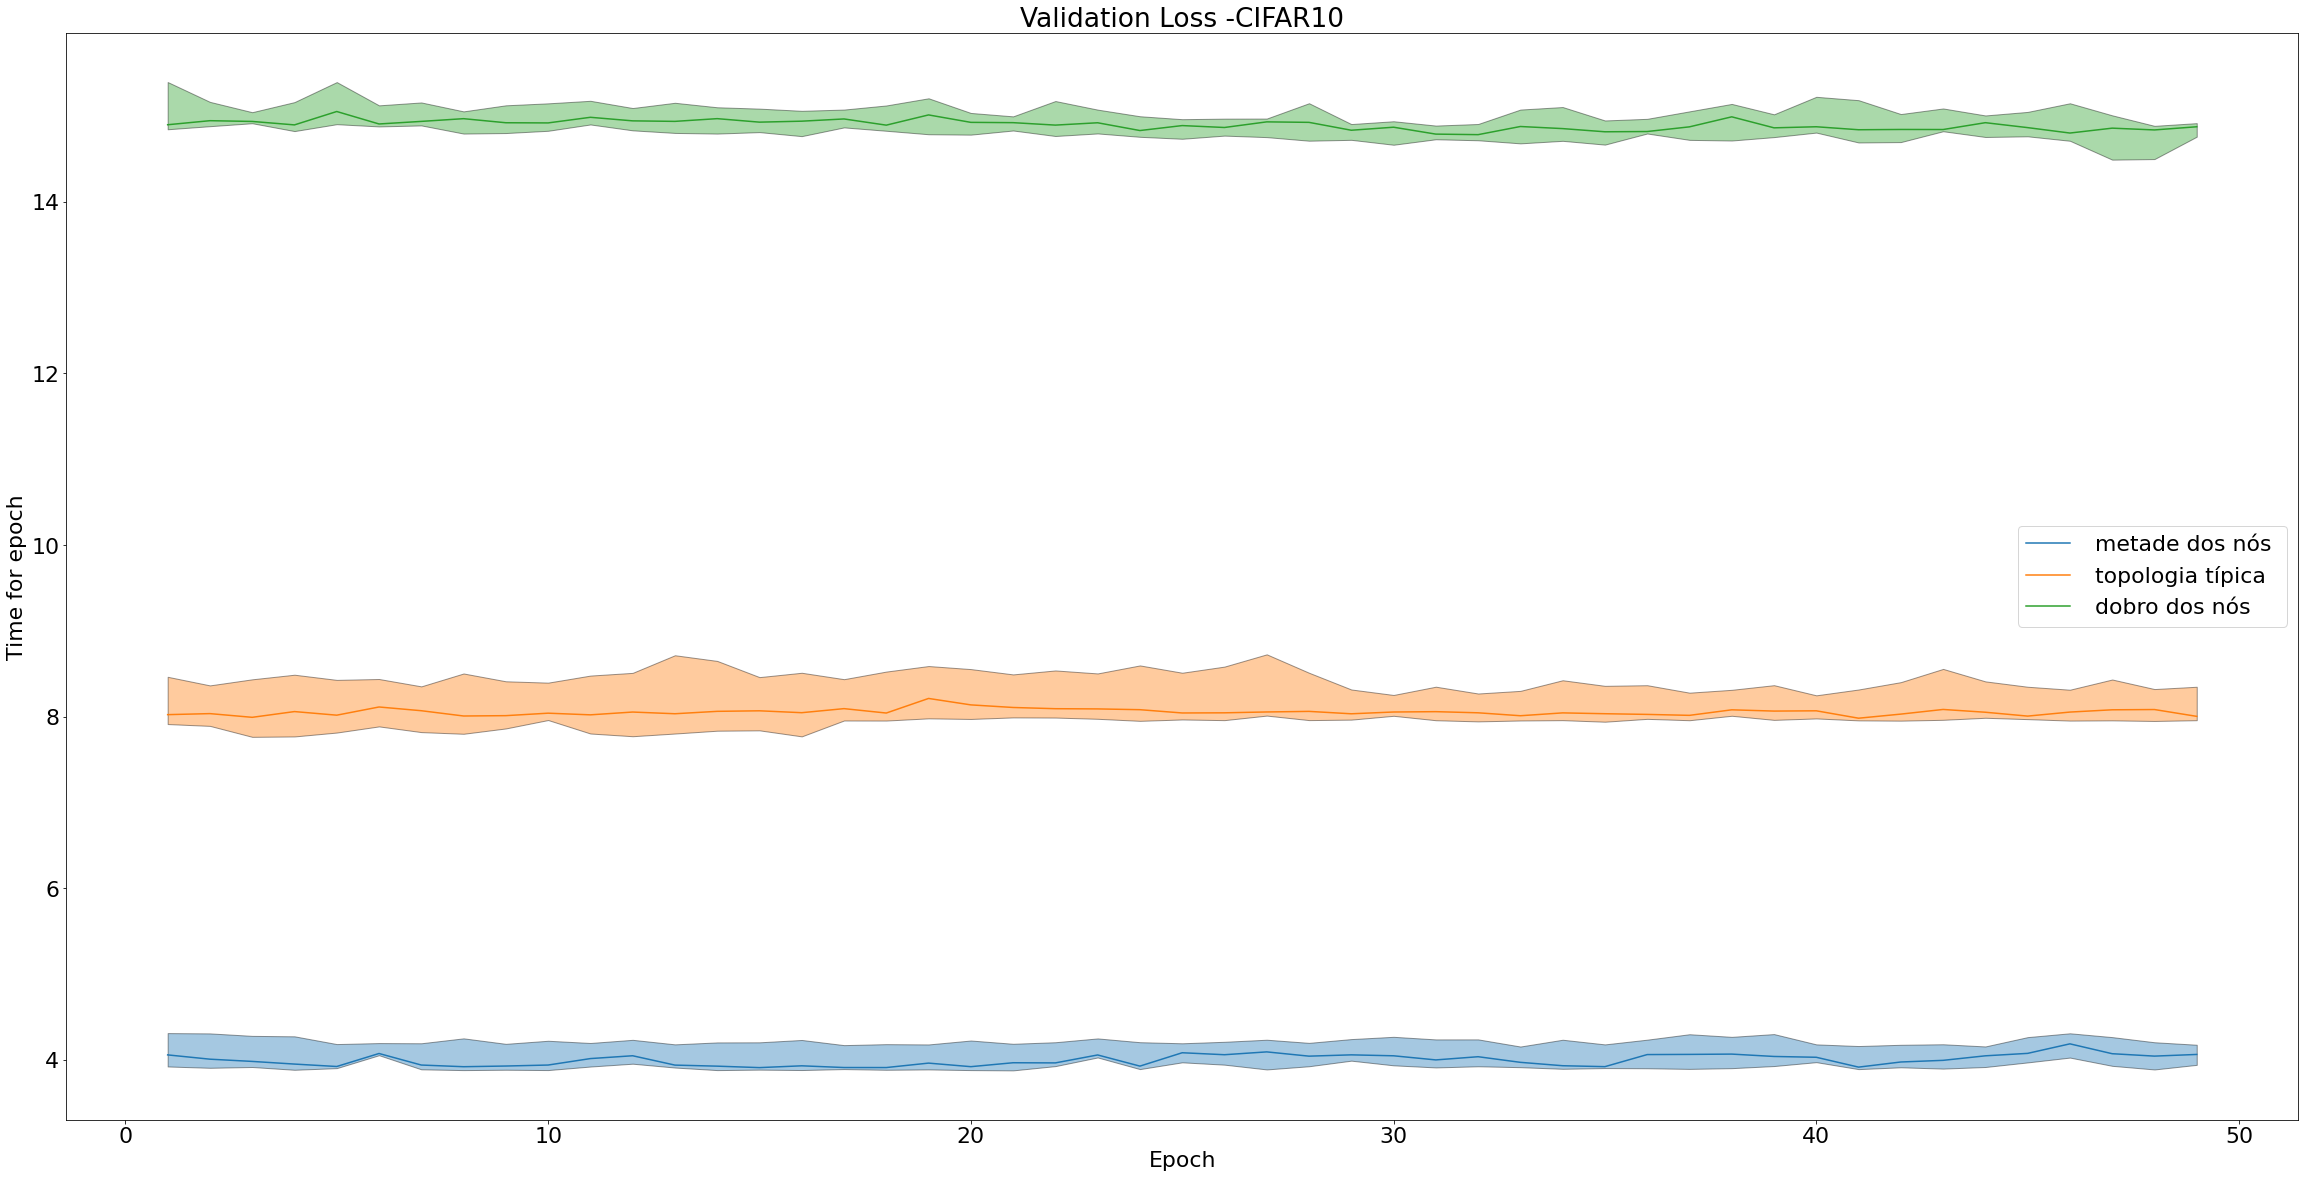

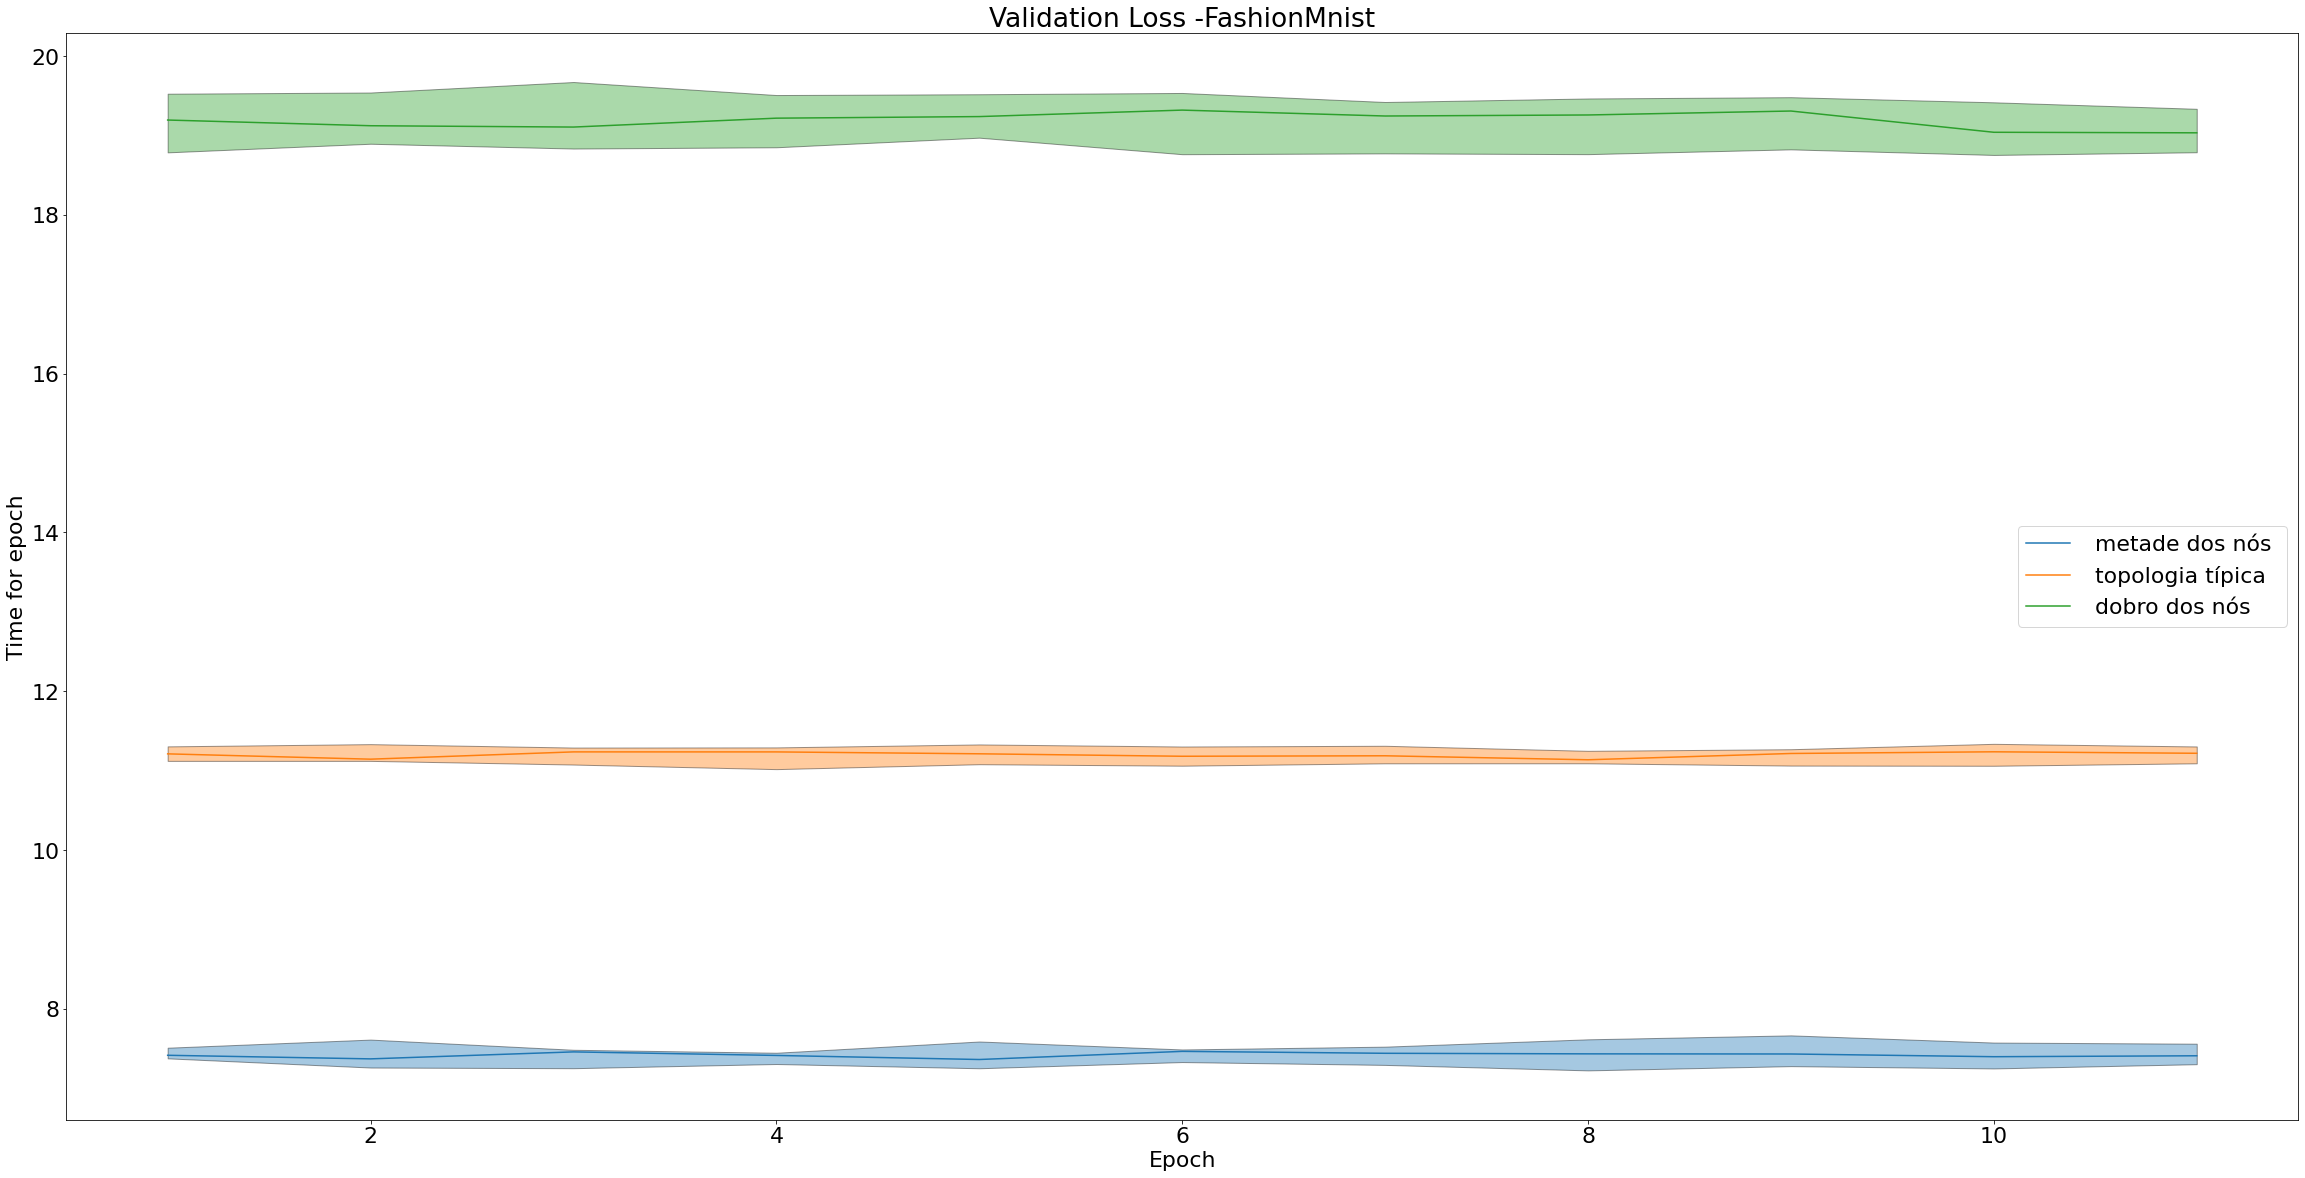

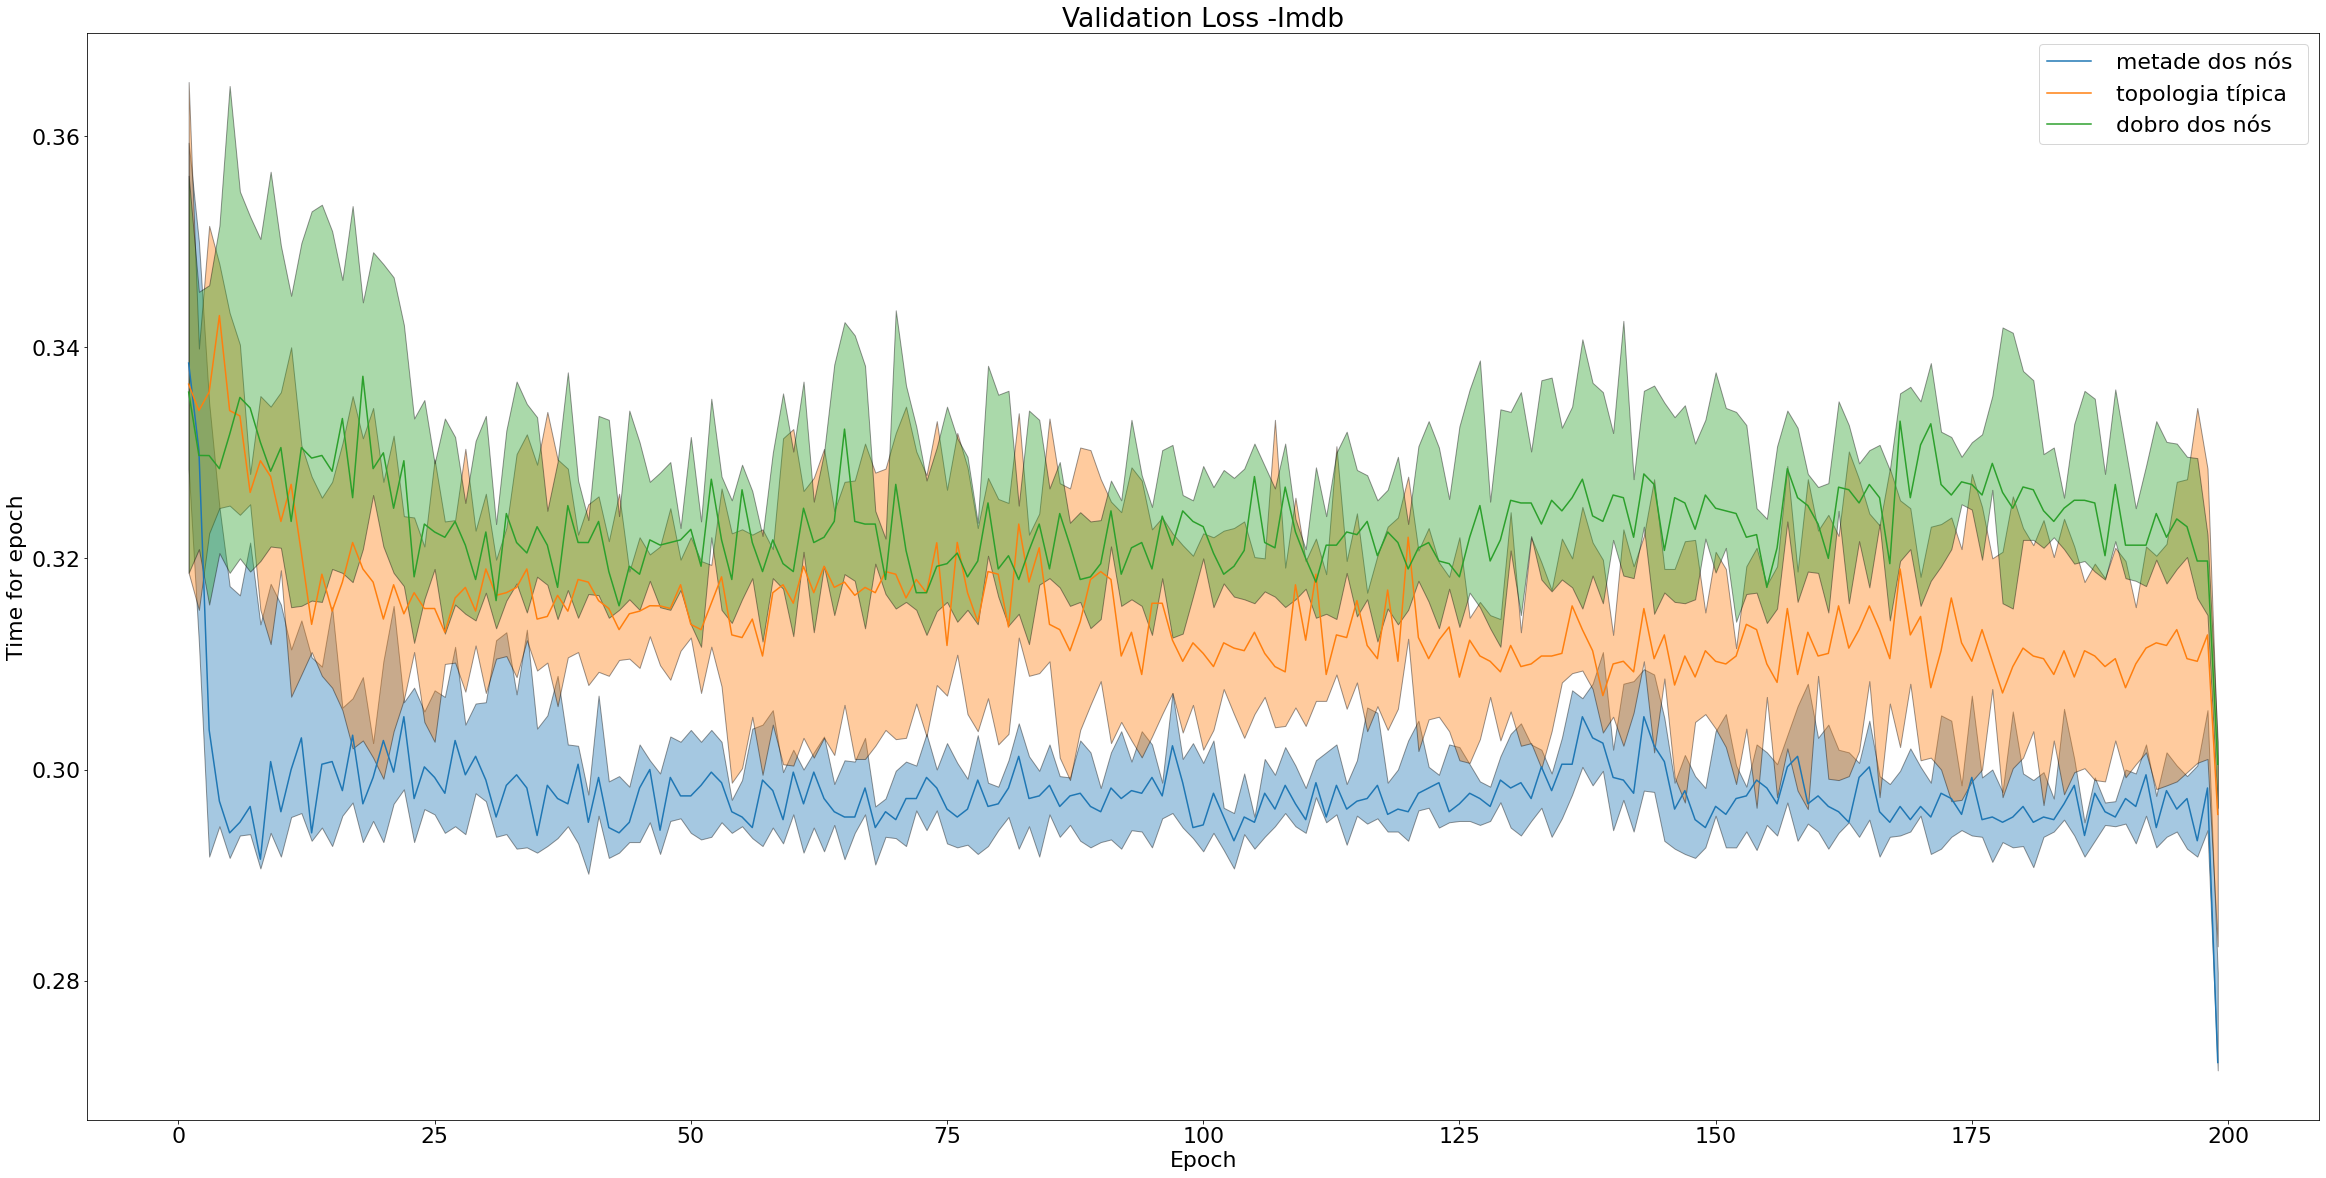

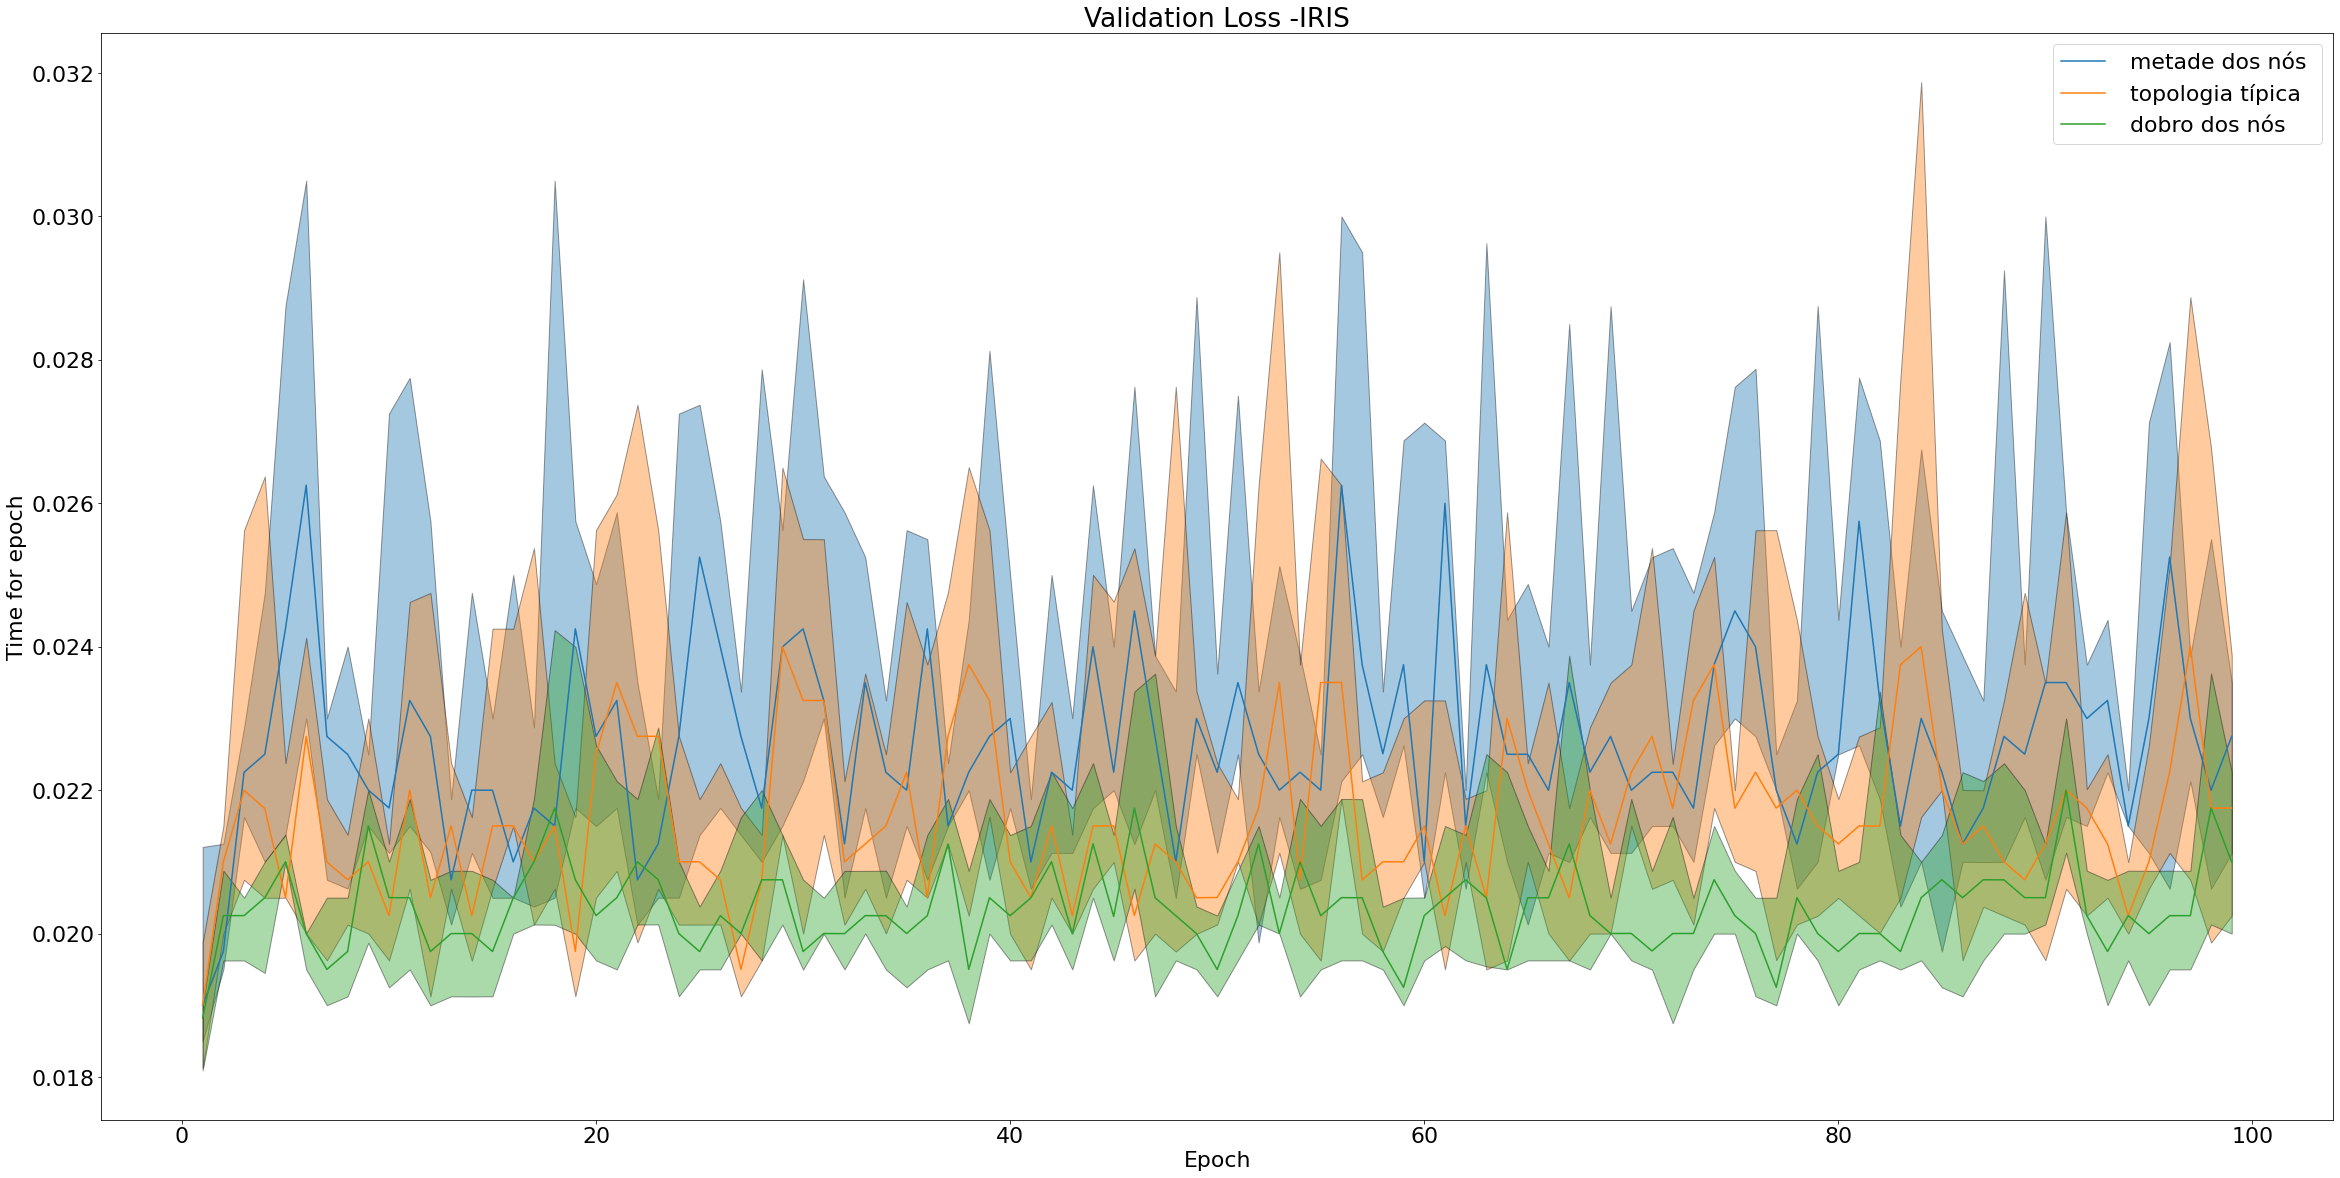

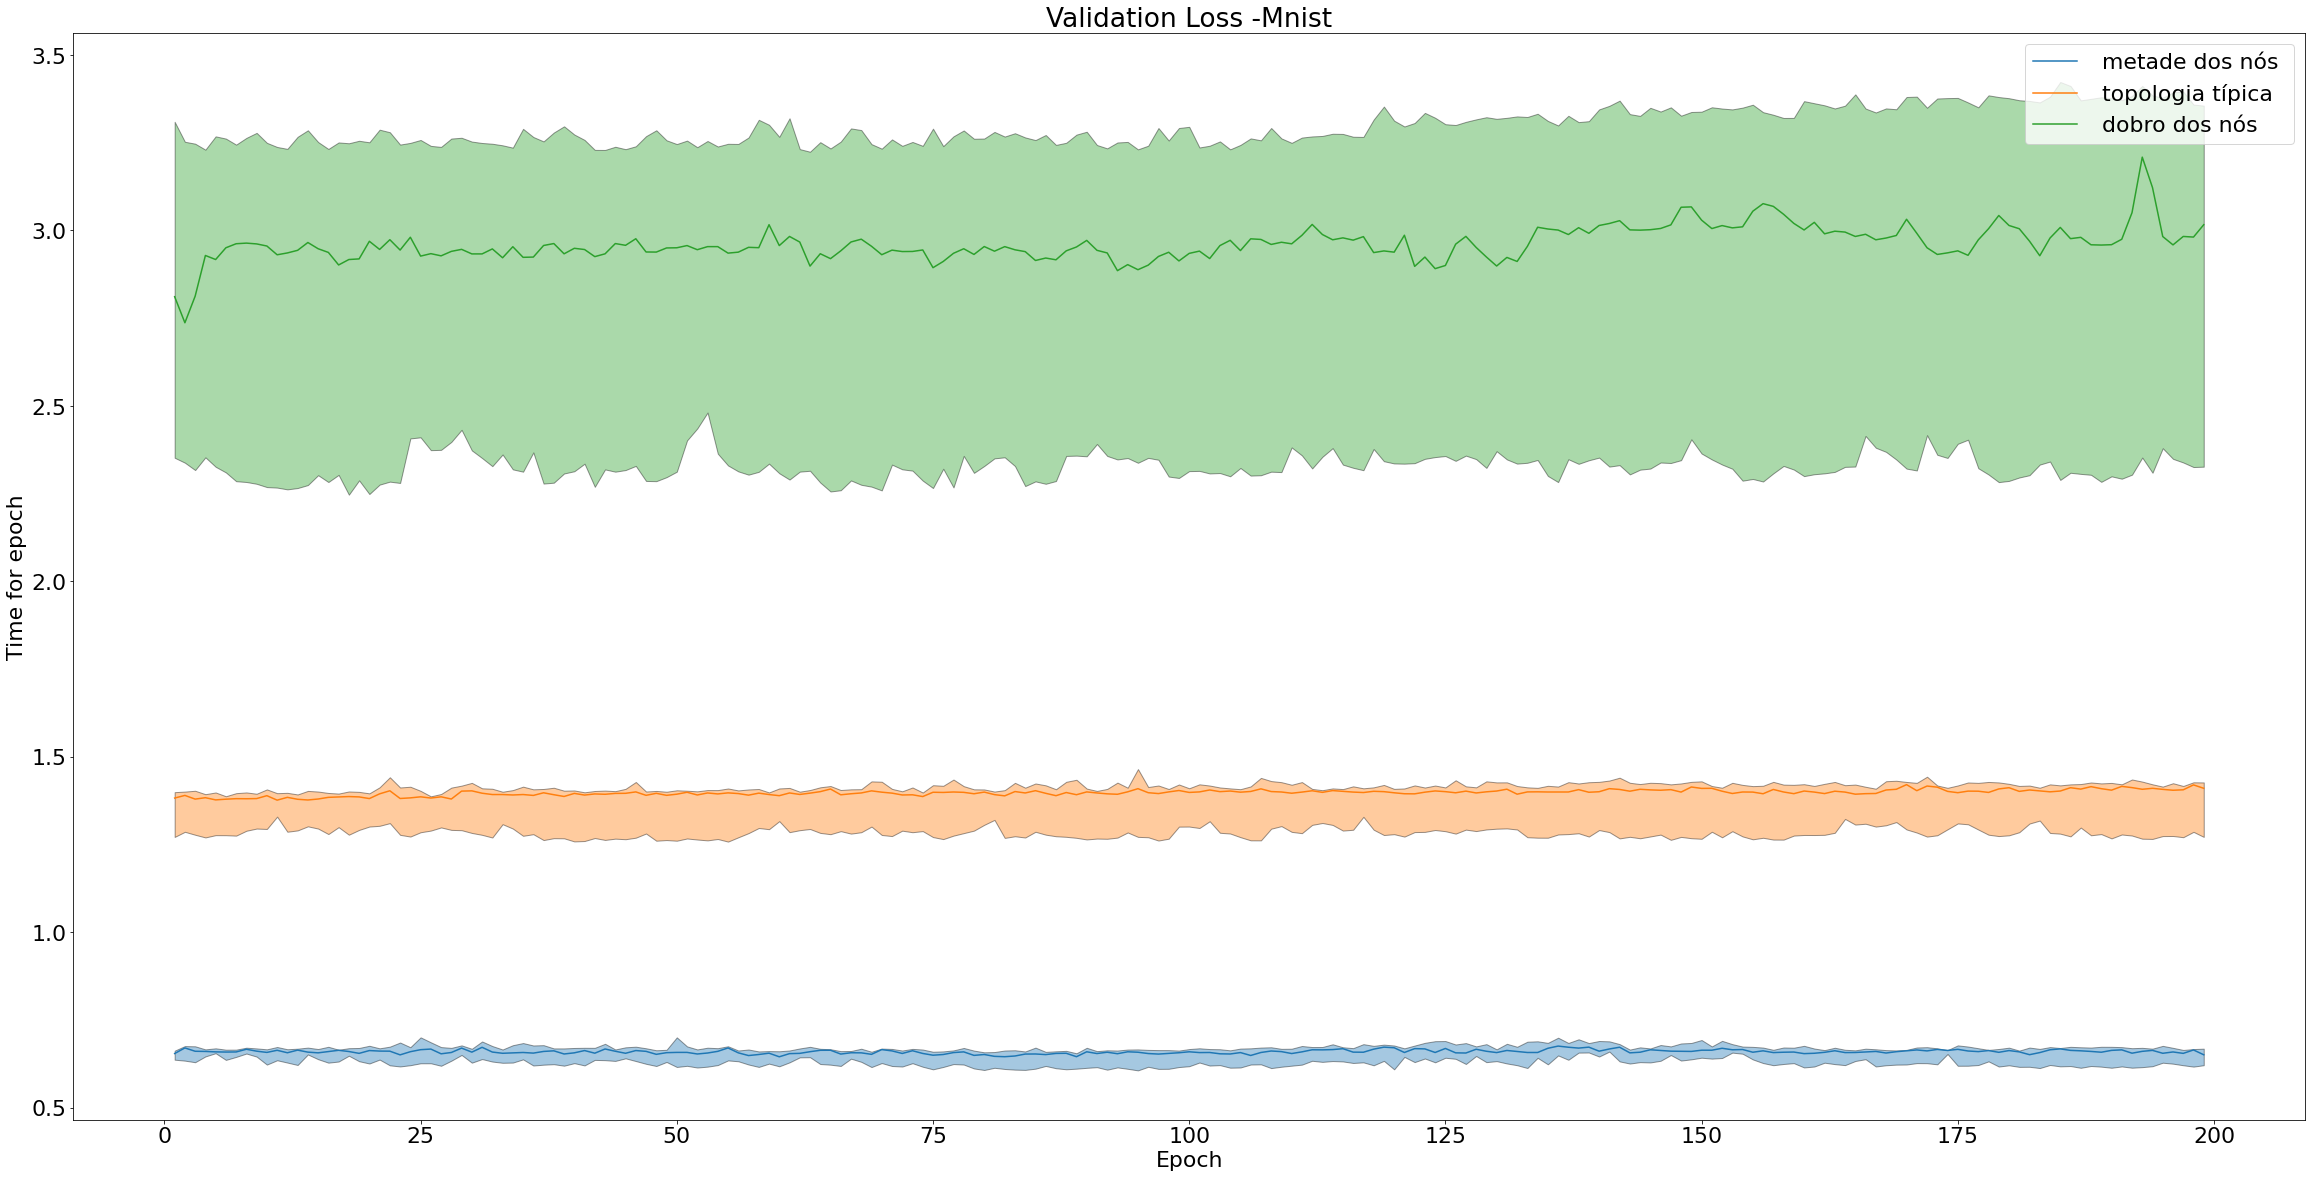

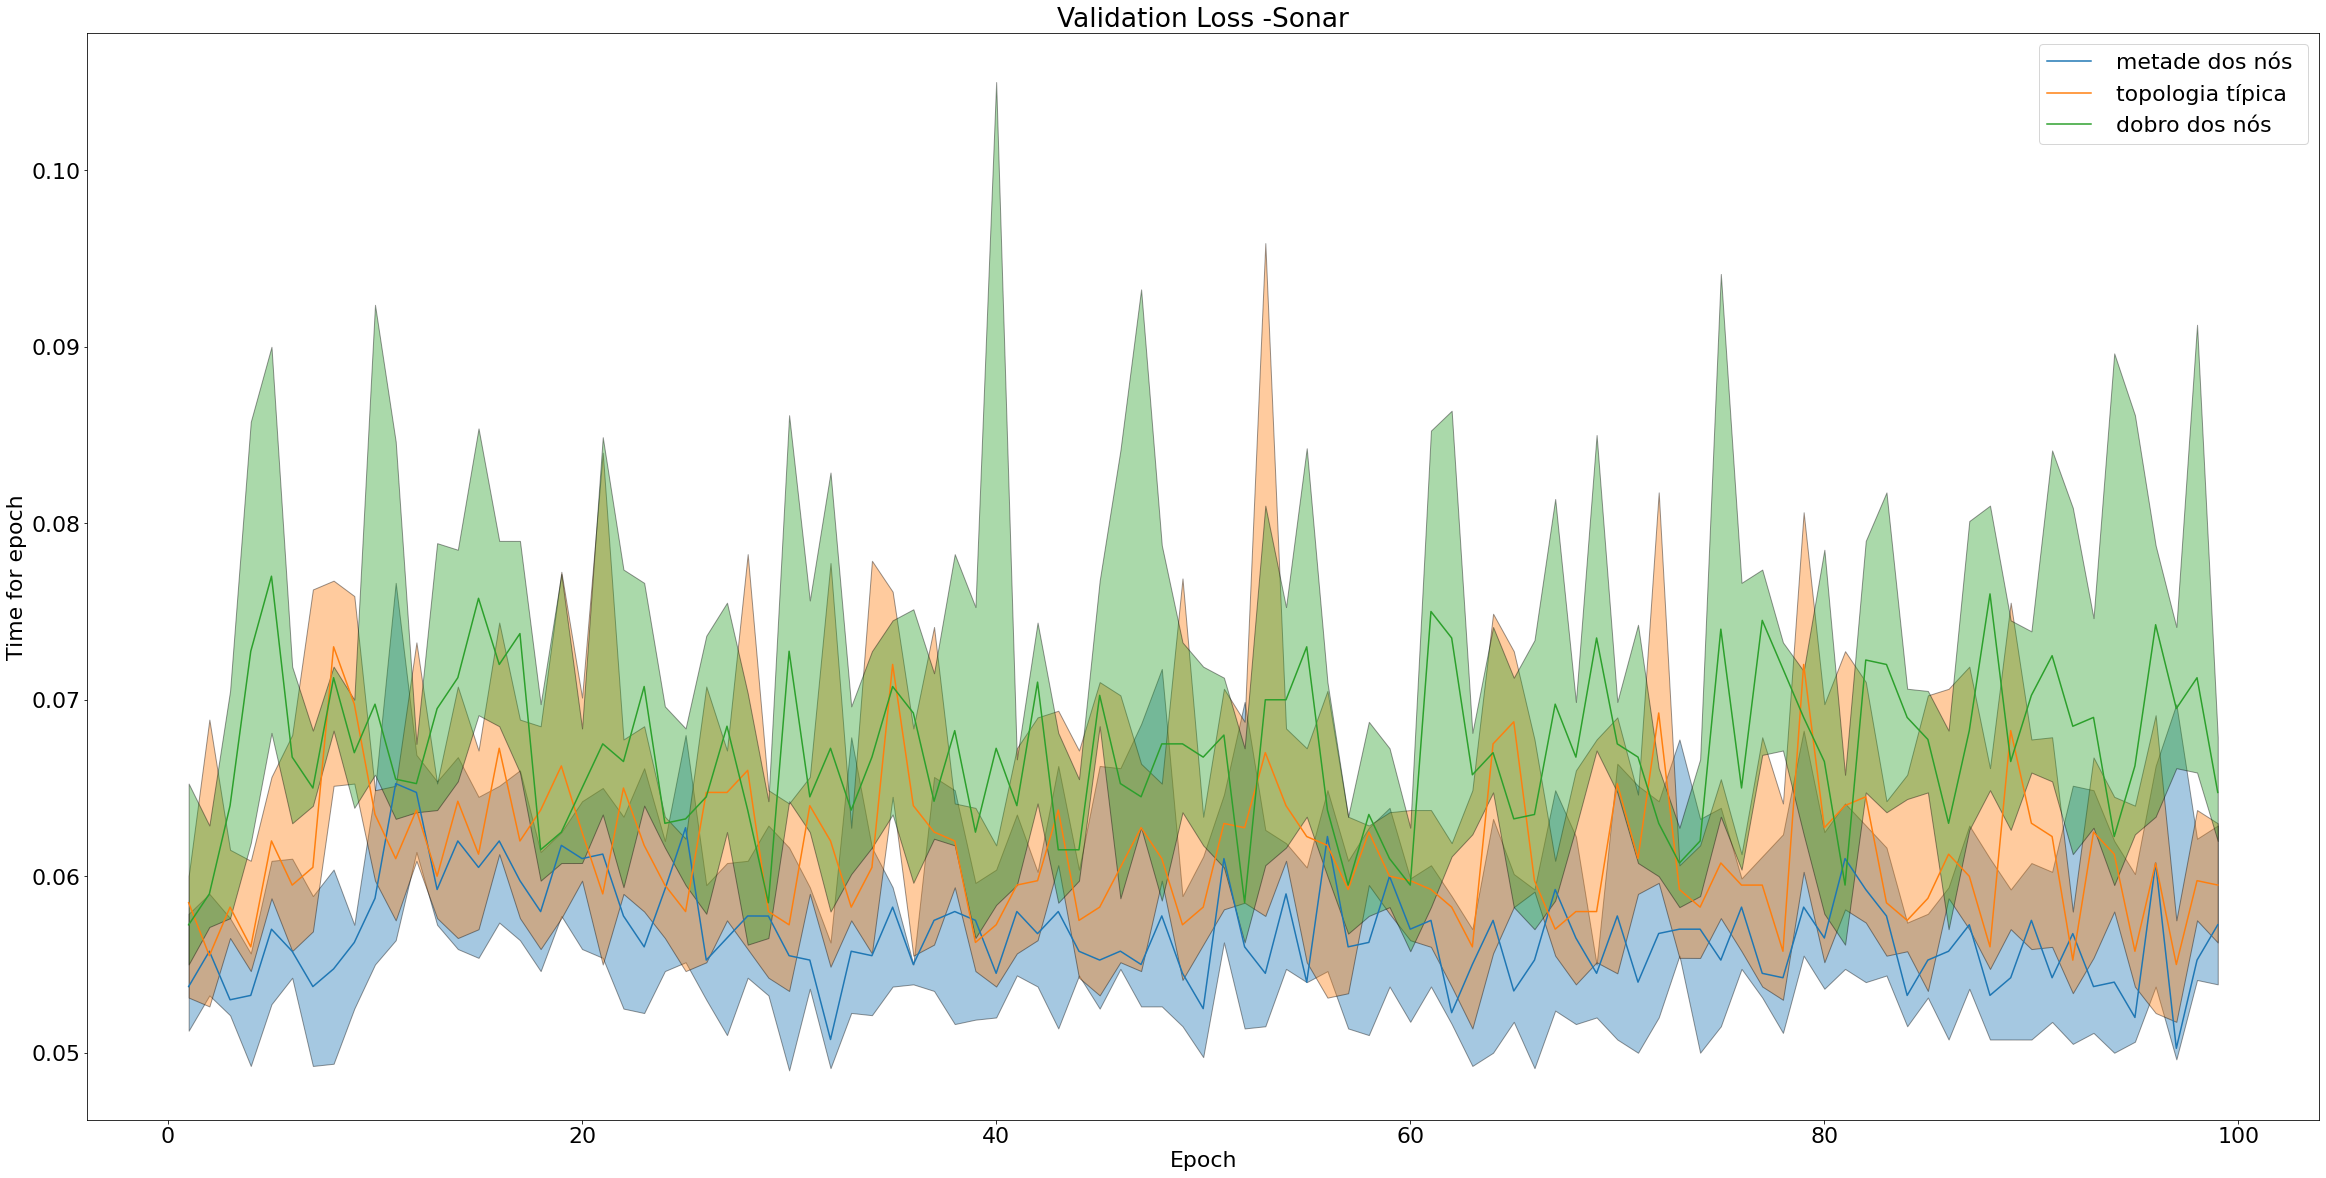

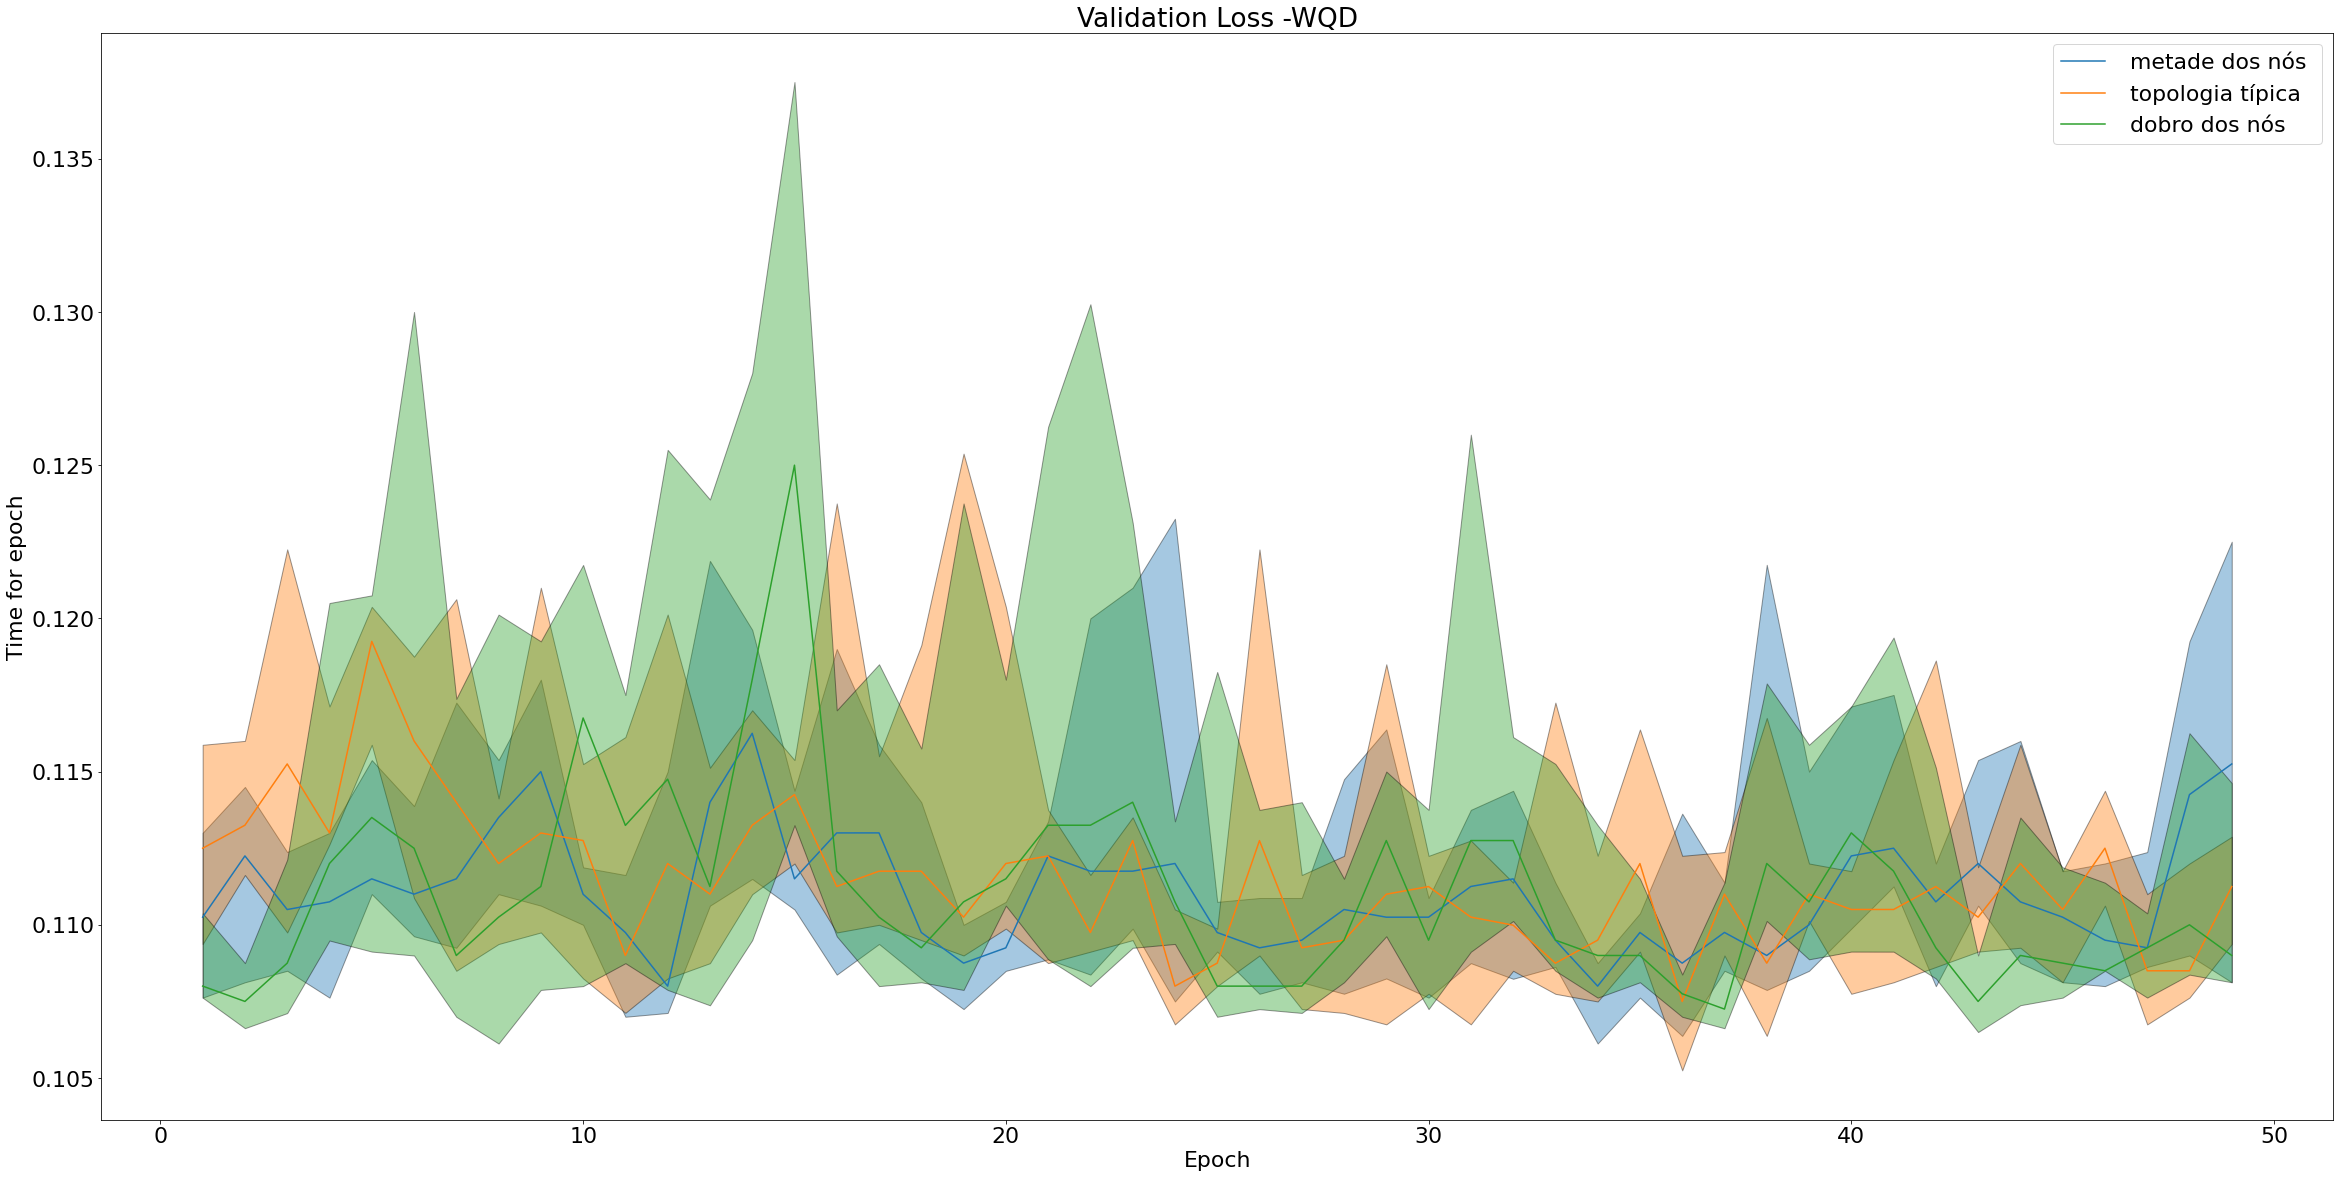

In [40]:
dataset=['Abalone','Banknote','CIFAR10','FashionMnist','Imdb','IRIS','Mnist','Sonar','WQD']

def new_name(data,mltp,seed="mean"):
    return data+"_"+str(mltp).replace(".","_")+"_seed_"+str(seed)

def time_lines(d,mltp):
    time_line=[0]
    for x in dic_times_mean[new_name(d,mltp)]:
        time_line.append(x[0]+time_line[-1])     
    time_line=time_line[1:]   
    return time_line
def label_name(mltp):
    if mltp==0.5:
        return " metade dos nós "
    if mltp==1:
        return " topologia típica "
    if mltp==2:
        return " dobro dos nós "
for d in dataset:

    seeds = list(range(0,10))
    multiply= [0.5,1,2]
    dic_Vloss={}
    dic_Tloss={}
    dic_times={}
    dic_Vloss_mean={}
    dic_Tloss_mean={}
    dic_times_mean={}
    
        
    for mltp in multiply:
        pepochs=500
        for actual_seed in seeds:
            filename =  ".\\" + d + "_seed_result/"+d+"_" + str(mltp) + "_" +str(actual_seed)+ ".csv"
            data = pd.read_csv(filename)
            index = data.index
            k = len(index)
            epochs = data['epoch']
            if pepochs >len(epochs):
                pepochs=len(epochs)

            dic_Tloss[new_name(d,mltp,actual_seed)]=data['loss'].tolist()    #Trainig loss valeus
            dic_Vloss[new_name(d,mltp,actual_seed)]=data['val_loss'].tolist()  #Validation loss valeus
            dic_times[new_name(d,mltp,actual_seed)]=data['time'].tolist()  #Validation loss valeus
        
     #calculo do valor medio e desvio padrão
    
    for mltp in multiply:
        dic_Vloss_mean[new_name(d,mltp)]=[]
        dic_times_mean[new_name(d,mltp)]=[]
        for step in list(range(0,pepochs)): 
            soma=[]
            tempos=[]
            for actual_seed in seeds:
                soma.append(dic_Vloss[new_name(d,mltp,actual_seed)][step])
                tempos.append(dic_times[new_name(d,mltp,actual_seed)][step])
            mediana= np.quantile(soma,0.5)
            firstq=np.quantile(soma,0.25)
            thirdq=np.quantile(soma,0.75)
            time=np.quantile(tempos,0.5)
            time_fq=np.quantile(tempos,0.25)
            time_tq=np.quantile(tempos,0.75)
            dic_Vloss_mean[new_name(d,mltp)].append((mediana,firstq,thirdq)) #Validation loss valeus médio
            dic_times_mean[new_name(d,mltp)].append((time,time_fq,time_tq)) #Validation loss valeus médio

    #linha temporal 
          



    fig = plt.figure()
    plt.title("Validation Loss -" + d )
    plt.rcParams['font.size'] = 22  
    plt.xlabel('Epoch')
    plt.ylabel('Time for epoch')




    for mltp in multiply:
        time_line=[0]
        Array_med=[]
        Array_firstq=[]
        Array_thirdq=[]
        for x in dic_times_mean[new_name(d,mltp)]: 
            Array_med.append(x[0])
            Array_firstq.append(x[1])
            Array_thirdq.append(x[2])
      
        plt.plot(list(range(1,pepochs)),Array_med[1:len(Array_med)] , label=label_name(mltp))
        data = {
            'x':  list(range(1,pepochs)),
            'y1': [y  for y in Array_firstq[1:len(Array_med)]],
            'y2': [y  for y in Array_thirdq[1:len(Array_med)]]}
        plt.fill_between(**data, alpha=.4, linewidth=1,     
                     edgecolor='k')
        plt.legend()

    fig.savefig('Anexo'+d+'_tempos.png')







